In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [ ]:
FILE_DATA = 'data_retail_monthly.csv'
FILE_MODEL = 'model_forecast.pkl'

In [ ]:
def train_visualize_forecast():
    try:
        df = pd.read_csv(FILE_DATA)
    except:
        print("Jalankan generator dulu!")
        return

    X = df.drop('Sales_Qty', axis=1)
    y = df['Sales_Qty']

In [ ]:
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['Month', 'Price', 'Competitor_Price', 'Tech_Score', 'Social_Hype', 'Prev_Sales', 'Ad_Spend']),
            ('cat', OneHotEncoder(handle_unknown='ignore'), ['Category', 'Season'])
        ]
    )

    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
    ])

In [ ]:
    print("🤖 AI sedang training...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

In [ ]:
    joblib.dump(model, FILE_MODEL)
    score = r2_score(y_test, model.predict(X_test))
    print(f"✅ Model Disimpan. Akurasi R2: {score:.3f}")

In [ ]:
    print("\n📊 Sedang membuat Grafik Perbandingan Per Bulan...")

In [ ]:
    df['Prediksi_Sales'] = model.predict(X)

In [ ]:
    monthly_data = df.groupby('Month')[['Sales_Qty', 'Prediksi_Sales']].sum().reset_index()
    
    plt.figure(figsize=(12, 6))

In [ ]:
    plt.plot(monthly_data['Month'], monthly_data['Sales_Qty'], 
             marker='o', label='Penjualan ASLI', color='blue', linewidth=2)

In [ ]:
    plt.plot(monthly_data['Month'], monthly_data['Prediksi_Sales'], 
             marker='x', label='Prediksi AI', color='red', linestyle='--', linewidth=2)
    
    plt.title("Tren Penjualan: Data Asli vs Prediksi AI (24 Bulan)")
    plt.xlabel("Bulan Ke-")
    plt.ylabel("Total Unit Terjual")
    plt.legend()
    plt.grid(True, alpha=0.3)

In [ ]:
    plt.show()

In [ ]:
    print("\n🔮 --- PREDIKSI BULAN DEPAN (BULAN KE-25) ---")

In [ ]:
    last_month_data = df[df['Month'] == 24].copy()

🤖 AI sedang training...
✅ Model Disimpan. Akurasi R2: 0.768

📊 Sedang membuat Grafik Perbandingan Per Bulan...


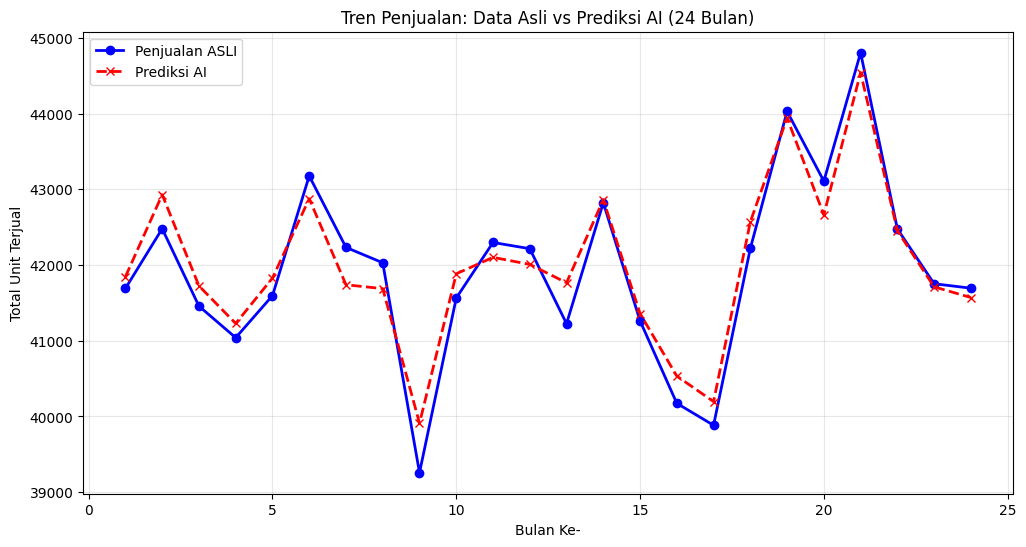


🔮 --- PREDIKSI BULAN DEPAN (BULAN KE-25) ---
Top 5 Produk yang diprediksi paling laku bulan depan:
        Category   Price  Prev_Sales  Forecast_Sales_Bln_25
1193      Laptop  141.63        1175                1133.58
1177  Smartphone  100.03        1023                1117.78
1165    Home_IoT  244.90        1151                1116.72
1168     Fashion  129.75        1127                1115.30
1162     Fashion  247.66         971                1095.94


In [ ]:
    last_month_data['Month'] = 25 
    
    last_month_data['Prev_Sales'] = last_month_data['Sales_Qty']

    last_month_data['Ad_Spend'] = last_month_data['Ad_Spend'] * 1.1

    last_month_data['Season'] = 'Winter' 

    future_pred = model.predict(last_month_data.drop(['Sales_Qty', 'Prediksi_Sales'], axis=1))

    last_month_data['Forecast_Sales_Bln_25'] = future_pred
    
    print("Top 5 Produk yang diprediksi paling laku bulan depan:")
    hasil_forecast = last_month_data[['Category', 'Price', 'Prev_Sales', 'Forecast_Sales_Bln_25']]
    print(hasil_forecast.sort_values(by='Forecast_Sales_Bln_25', ascending=False).head(5))

if __name__ == "__main__":
    train_visualize_forecast()